In [1]:
import pandas as pd 
import numpy as np 
from pathlib import Path
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from ngboost import NGBRegressor
from ngboost.distns import Exponential, Normal, LogNormal
import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [2]:
#import creep data
creep_df = pd.read_csv('../Data/SS316_dataset.csv')
creep_df

,Material,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,Ti,Al,B,N,Nb+Ta,Elongation,Reduction of Area,Stress,Temperature,creep_rupture_life
0,0,0.060,0.59,1.69,0.024,0.017,13.32,16.73,2.38,0.07,0.0110,0.015,0.0010,0.0300,0.020,55,61,235,650,29.2
1,1,0.050,0.52,1.51,0.021,0.010,13.21,16.42,2.34,0.14,0.0110,0.018,0.0005,0.0340,0.010,68,78,157,700,34.5
2,7,0.060,0.52,1.60,0.025,0.007,13.30,16.70,2.25,0.24,0.0600,0.020,0.0008,0.0318,0.010,72,77,235,650,38.8
3,18,0.012,0.56,0.81,0.024,0.004,10.67,16.39,2.11,0.27,0.0006,0.011,0.0010,0.0810,0.001,106,80,177,700,39.0
4,8,0.060,0.52,1.58,0.025,0.007,13.60,16.60,2.31,0.26,0.0290,0.021,0.0007,0.0224,0.010,75,83,157,700,40.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,7,0.060,0.52,1.60,0.025,0.007,13.30,16.70,2.25,0.24,0.0600,0.020,0.0008,0.0318,0.010,41,55,118,600,142185.9
613,6,0.070,0.61,1.65,0.025,0.007,13.60,16.60,2.33,0.26,0.0430,0.017,0.0011,0.0250,0.010,26,39,108,600,152758.0
614,2,0.050,0.71,1.52,0.022,0.013,13.50,17.50,2.28,0.17,0.0550,0.027,0.0013,0.0350,0.020,28,37,108,600,173814.3
615,6,0.070,0.61,1.65,0.025,0.007,13.60,16.60,2.33,0.26,0.0430,0.017,0.0011,0.0250,0.010,25,23,41,700,178190.4


In [3]:
Log_Creep_Life = np.log10(creep_df['creep_rupture_life'])
creep_df['Log_Creep_Life'] = Log_Creep_Life
creep_df = creep_df.drop(columns = ['creep_rupture_life'])

In [4]:
creep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Material           617 non-null    int64  
 1   C                  617 non-null    float64
 2   Si                 617 non-null    float64
 3   Mn                 617 non-null    float64
 4   P                  617 non-null    float64
 5   S                  617 non-null    float64
 6   Ni                 617 non-null    float64
 7   Cr                 617 non-null    float64
 8   Mo                 617 non-null    float64
 9   Cu                 617 non-null    float64
 10  Ti                 617 non-null    float64
 11  Al                 617 non-null    float64
 12  B                  617 non-null    float64
 13  N                  617 non-null    float64
 14  Nb+Ta              617 non-null    float64
 15  Elongation         617 non-null    int64  
 16  Reduction of Area  617 non

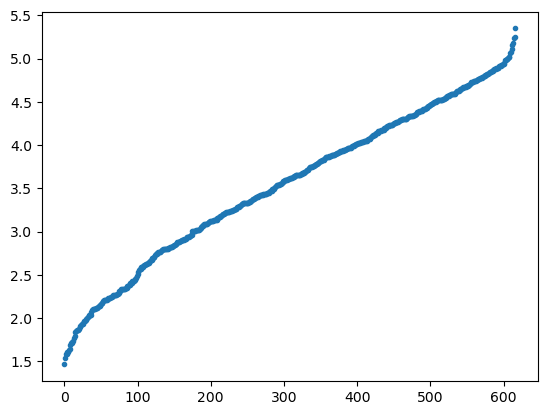

In [5]:
plt.plot(creep_df['Log_Creep_Life'], '.')

In [6]:
features = creep_df.iloc[:, 0:19]
targets = creep_df.iloc[:, 19]
features

,Material,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,Ti,Al,B,N,Nb+Ta,Elongation,Reduction of Area,Stress,Temperature
0,0,0.060,0.59,1.69,0.024,0.017,13.32,16.73,2.38,0.07,0.0110,0.015,0.0010,0.0300,0.020,55,61,235,650
1,1,0.050,0.52,1.51,0.021,0.010,13.21,16.42,2.34,0.14,0.0110,0.018,0.0005,0.0340,0.010,68,78,157,700
2,7,0.060,0.52,1.60,0.025,0.007,13.30,16.70,2.25,0.24,0.0600,0.020,0.0008,0.0318,0.010,72,77,235,650
3,18,0.012,0.56,0.81,0.024,0.004,10.67,16.39,2.11,0.27,0.0006,0.011,0.0010,0.0810,0.001,106,80,177,700
4,8,0.060,0.52,1.58,0.025,0.007,13.60,16.60,2.31,0.26,0.0290,0.021,0.0007,0.0224,0.010,75,83,157,700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,7,0.060,0.52,1.60,0.025,0.007,13.30,16.70,2.25,0.24,0.0600,0.020,0.0008,0.0318,0.010,41,55,118,600
613,6,0.070,0.61,1.65,0.025,0.007,13.60,16.60,2.33,0.26,0.0430,0.017,0.0011,0.0250,0.010,26,39,108,600
614,2,0.050,0.71,1.52,0.022,0.013,13.50,17.50,2.28,0.17,0.0550,0.027,0.0013,0.0350,0.020,28,37,108,600
615,6,0.070,0.61,1.65,0.025,0.007,13.60,16.60,2.33,0.26,0.0430,0.017,0.0011,0.0250,0.010,25,23,41,700


In [7]:
def coverage(y, yL, yH):
    return np.sum(100 / y.shape[0] * ((y>yL)&(y<yH)))

Run # 1 Fold # 1
[iter 0] loss=1.3467 val_loss=1.4749 scale=1.0000 norm=0.5376
[iter 100] loss=1.0751 val_loss=1.1926 scale=1.0000 norm=0.4032
[iter 200] loss=0.9080 val_loss=1.0443 scale=1.0000 norm=0.3810
[iter 300] loss=0.7471 val_loss=0.9327 scale=1.0000 norm=0.3716
[iter 400] loss=0.5704 val_loss=0.7905 scale=1.0000 norm=0.3690
[iter 500] loss=0.3826 val_loss=0.6843 scale=2.0000 norm=0.7347
== Early stopping achieved.
== Best iteration / VAL569 (val_loss=0.6462)
Pearson CC: 0.882788232518984
R2 score: 0.7644748026469618
RMSE: 0.417991641037345
MAE: 0.3336322353290908
Coverage: 93.54838709677422
Median Interval Width: 1.6460769059143983
Composite Metric: 0.8534891607091256


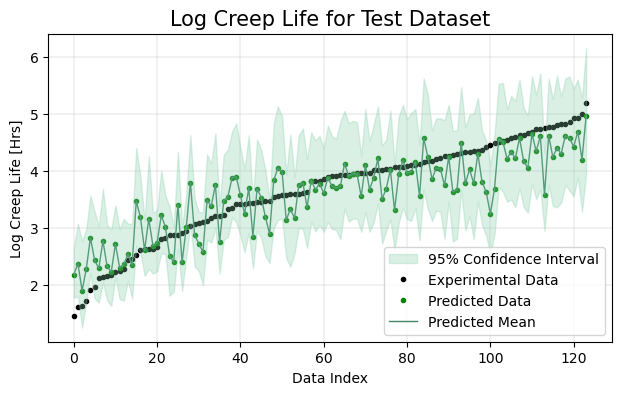

Run # 1 Fold # 2
[iter 0] loss=1.3414 val_loss=1.4683 scale=1.0000 norm=0.5355
[iter 100] loss=1.0721 val_loss=1.2014 scale=1.0000 norm=0.4045
[iter 200] loss=0.8977 val_loss=1.0271 scale=1.0000 norm=0.3764
[iter 300] loss=0.7340 val_loss=0.8821 scale=1.0000 norm=0.3680
[iter 400] loss=0.5284 val_loss=0.6930 scale=2.0000 norm=0.7267
[iter 500] loss=0.3266 val_loss=0.5432 scale=1.0000 norm=0.3565
[iter 600] loss=0.1667 val_loss=0.4375 scale=1.0000 norm=0.3525
[iter 700] loss=0.0382 val_loss=0.3855 scale=1.0000 norm=0.3532
== Early stopping achieved.
== Best iteration / VAL739 (val_loss=0.3763)
Pearson CC: 0.9361937891565593
R2 score: 0.8598908631538851
RMSE: 0.34536666286473217
MAE: 0.27725227768468264
Coverage: 88.70967741935485
Median Interval Width: 1.1622931418377156
Composite Metric: 0.8804146181020132


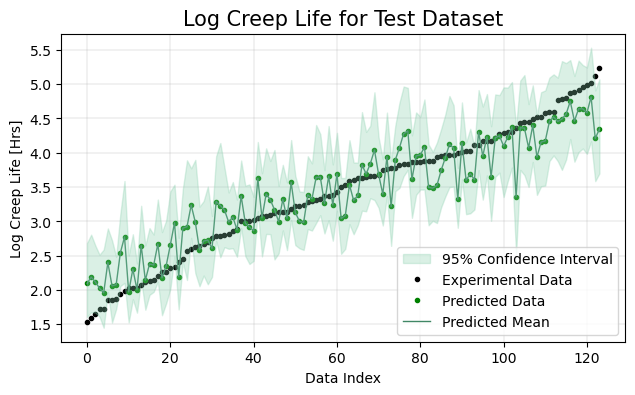

Run # 1 Fold # 3
[iter 0] loss=1.3449 val_loss=1.4750 scale=1.0000 norm=0.5476
[iter 100] loss=1.0718 val_loss=1.1982 scale=1.0000 norm=0.4103
[iter 200] loss=0.9026 val_loss=1.0309 scale=1.0000 norm=0.3835
[iter 300] loss=0.7325 val_loss=0.8913 scale=1.0000 norm=0.3772
[iter 400] loss=0.5223 val_loss=0.7165 scale=1.0000 norm=0.3744
[iter 500] loss=0.3254 val_loss=0.5860 scale=2.0000 norm=0.7291
[iter 600] loss=0.1653 val_loss=0.5089 scale=1.0000 norm=0.3588
[iter 700] loss=0.0471 val_loss=0.4566 scale=1.0000 norm=0.3606
== Early stopping achieved.
== Best iteration / VAL780 (val_loss=0.4262)
Pearson CC: 0.9512245162042827
R2 score: 0.8880271391667244
RMSE: 0.3065182795534522
MAE: 0.24607072356081947
Coverage: 93.49593495934955
Median Interval Width: 1.1085685903459206
Composite Metric: 0.9267355534912127


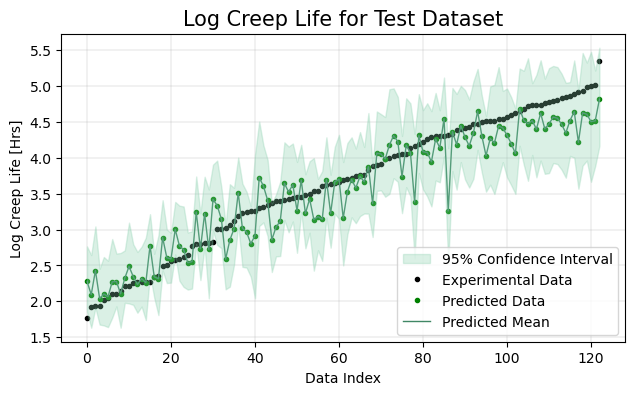

Run # 1 Fold # 4
[iter 0] loss=1.3631 val_loss=1.4845 scale=1.0000 norm=0.5513
[iter 100] loss=1.0875 val_loss=1.2209 scale=1.0000 norm=0.4080
[iter 200] loss=0.9179 val_loss=1.0548 scale=1.0000 norm=0.3784
[iter 300] loss=0.7199 val_loss=0.8965 scale=1.0000 norm=0.3668
[iter 400] loss=0.4311 val_loss=0.6938 scale=2.0000 norm=0.7207
[iter 500] loss=0.1982 val_loss=0.6006 scale=1.0000 norm=0.3470
== Early stopping achieved.
== Best iteration / VAL580 (val_loss=0.5774)
Pearson CC: 0.9194396933648967
R2 score: 0.831601007354035
RMSE: 0.3610752674240081
MAE: 0.27232142995463676
Coverage: 92.68292682926825
Median Interval Width: 1.2837964761657539
Composite Metric: 0.8898568680395531


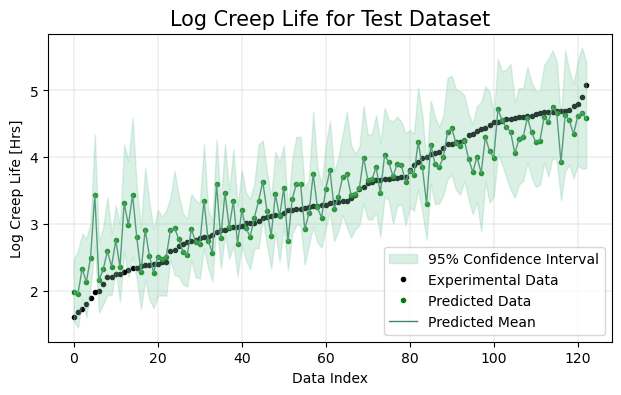

Run # 1 Fold # 5
[iter 0] loss=1.3536 val_loss=1.4773 scale=1.0000 norm=0.5448
[iter 100] loss=1.0784 val_loss=1.2205 scale=1.0000 norm=0.4118
[iter 200] loss=0.9065 val_loss=1.0824 scale=1.0000 norm=0.3876
[iter 300] loss=0.7278 val_loss=0.9532 scale=1.0000 norm=0.3789
[iter 400] loss=0.4466 val_loss=0.7364 scale=2.0000 norm=0.7515
[iter 500] loss=0.2549 val_loss=0.6557 scale=2.0000 norm=0.7499
== Early stopping achieved.
== Best iteration / VAL552 (val_loss=0.6329)
Pearson CC: 0.8967133400573986
R2 score: 0.7883839685751204
RMSE: 0.4133483100065904
MAE: 0.34025229631652454
Coverage: 93.49593495934955
Median Interval Width: 1.4838326723948048
Composite Metric: 0.8697021212190335


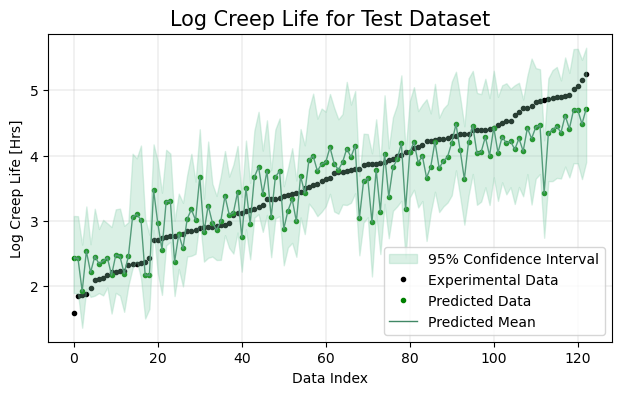

In [8]:
# Evaluate multiple runs of the model
nruns = 1
nfolds = 5

# Metrics for performance evaluation
PearsonCC = np.zeros((nruns, nfolds))
R2_score = np.zeros_like(PearsonCC)
RMSE = np.zeros_like(PearsonCC)
MAE = np.zeros_like(PearsonCC)
MAPE = np.zeros_like(PearsonCC)

test_coverage = np.zeros_like(PearsonCC)
upper_coverage = np.zeros_like(PearsonCC)
lower_coverage = np.zeros_like(PearsonCC)
mean_interval_width = np.zeros_like(PearsonCC)
median_interval_width = np.zeros_like(PearsonCC)
composite_metric = np.zeros_like(PearsonCC)
for j in range(nruns):

        kf = KFold(n_splits=nfolds, shuffle=True, random_state=66+j)

        for i, (tr, ts) in enumerate(kf.split(targets)):
            
            # Display the run number
            print('Run #', j+1, "Fold #", i+1)
            
            X_train, X_test = features.iloc[tr], features.iloc[ts]
            y_train, y_test = targets[tr], targets[ts]
            X_train, X_val, y_train, Y_val =train_test_split(X_train, y_train, test_size=0.2, random_state=42)
            
            
            model = NGBRegressor(Dist=LogNormal, n_estimators=1000, learning_rate=0.005)

            model.fit(X_train, y_train, X_val=X_val, Y_val=Y_val, early_stopping_rounds=4)

            y_pred_test = model.predict(X_test)
            
            y_test_ngb = model.pred_dist(X_test)

            PearsonCC[j, i] = pearsonr(y_test, y_pred_test)[0]
            R2_score[j, i] = r2_score(y_test, y_pred_test)
            RMSE[j, i] = sqrt(mean_squared_error(y_pred_test, y_test))
            MAE[j, i] = np.mean(abs(y_pred_test-y_test))
            
            print(f'Pearson CC: {PearsonCC[j, i]}')
            print(f'R2 score: {R2_score[j, i]}')
            print(f'RMSE: {RMSE[j, i]}')
            print(f'MAE: {MAE[j, i]}')
            
            df_test_low = y_test_ngb.interval(0.95)[0]
            df_test_median = y_pred_test
            df_test_high = y_test_ngb.interval(0.95)[1]
            
            test_coverage[j, i] = coverage(y_test, df_test_low, df_test_high) 
            print(f'Coverage: {test_coverage[j, i]}')

            # Prediction interval width
            median_interval_width[j, i] = np.median(df_test_high - df_test_low)
            print(f'Median Interval Width: {median_interval_width[j, i]}')

            # Composite metric that combines the coverage and the invers of interval width
            composite_metric[j, i] = 0.75*test_coverage[j, i]/100 + 0.25*(1/median_interval_width[j, i])
            print(f'Composite Metric: {composite_metric[j, i]}')

            # Plot the predictions
            fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
            iteration_list = [i for i in range(len(y_test))]

            y_pred = y_pred_test
            y_std = np.std(np.array(y_pred_test), axis=0)

            ## Uncertainty quantification plot
            ax[0].fill_between(iteration_list, df_test_low, df_test_high, alpha=0.3, color='#86cfac', zorder=5, label='95% Confidence Interval')
            ax[0].plot(iteration_list, y_test, 'ko', markersize=3, label="Experimental Data")
            ax[0].plot(iteration_list, y_pred, 'go', markersize=3, label="Predicted Data")
            ax[0].plot(iteration_list, y_pred, '-', linewidth=1, color="#408765", label="Predicted Mean")
            ax[0].legend(loc=4, fontsize=10, frameon=True)
            ax[0].set_xlabel("Data Index", fontsize=10)
            ax[0].set_ylabel("Log Creep Life [Hrs]", fontsize=10)
            ax[0].set_title("Log Creep Life for Test Dataset", fontsize=15)
            ax[0].grid(True, which='major', linestyle='-', linewidth='0.25')
            fig.delaxes(ax[1])

            plt.show()

In [9]:
# Data frame
df1 = pd.DataFrame({'Pearson CC': PearsonCC.flatten(), 'R2 Score': R2_score.flatten(), 'RMSE': RMSE.flatten(), 
                    'MAE': MAE.flatten(), 'Coverage': test_coverage.flatten()},index=None)
df1

,Pearson CC,R2 Score,RMSE,MAE,Coverage
0,0.882788,0.764475,0.417992,0.333632,93.548387
1,0.936194,0.859891,0.345367,0.277252,88.709677
2,0.951225,0.888027,0.306518,0.246071,93.495935
3,0.919440,0.831601,0.361075,0.272321,92.682927
4,0.896713,0.788384,0.413348,0.340252,93.495935


In [10]:
# Calculate mean values and standard deviations of the scores
PearsonCC_mean = np.mean(PearsonCC)
R2_score_mean = np.mean(R2_score)
RMSE_mean = np.mean(RMSE)
MAE_mean = np.mean(MAE)
test_coverage_mean = np.mean(test_coverage)

PearsonCC_std = np.std(PearsonCC)
R2_score_std = np.std(R2_score)
RMSE_std = np.std(RMSE)
MAE_std = np.std(MAE)
test_coverage_std = np.std(test_coverage)

# Data frame
df2 = pd.DataFrame({'Pearson CC Mean': PearsonCC_mean, 'Pearson CC Std': PearsonCC_std, 'R2 Score Mean': R2_score_mean, 'R2 Score Std': R2_score_std,
                  'RMSE Mean': RMSE_mean, 'RMSE Std': RMSE_std, 'MAE Mean': MAE_mean, 'MAE Std':MAE_std,
                   'RMSE Std': RMSE_std, 'Test Coverage Mean': test_coverage_mean, 'Test Coverage Std':test_coverage_std},index=[0])
df2

,Pearson CC Mean,Pearson CC Std,R2 Score Mean,R2 Score Std,RMSE Mean,RMSE Std,MAE Mean,MAE Std,Test Coverage Mean,Test Coverage Std
0,0.917272,0.025009,0.826476,0.045225,0.36886,0.042171,0.293906,0.036763,92.386572,1.866471


In [11]:
# Data frame
df3 = pd.DataFrame({'Coverage': test_coverage.flatten(), 'Median Interval Width': median_interval_width.flatten(), 'Composite Metric': composite_metric.flatten()},index=None)
df3

,Coverage,Median Interval Width,Composite Metric
0,93.548387,1.646077,0.853489
1,88.709677,1.162293,0.880415
2,93.495935,1.108569,0.926736
3,92.682927,1.283796,0.889857
4,93.495935,1.483833,0.869702


In [12]:
# Calculate mean values and standard deviations of the scores
test_coverage_mean = np.mean(test_coverage)

median_interval_width_mean = np.mean(median_interval_width)
composite_metric_mean = np.mean(composite_metric)

test_coverage_std = np.std(test_coverage)

median_interval_width_std = np.std(median_interval_width)
composite_metric_std = np.std(composite_metric)

# Data frame
df4 = pd.DataFrame({'Coverage Mean': test_coverage_mean, 'Coverage Std': test_coverage_std, 
                    'Interval Width Mean': median_interval_width_mean, 'Interval Width Std':median_interval_width_std,
                   'Composite Metric Mean': composite_metric_mean, 'Composite Metric Std': composite_metric_std,},index=[0])
df4

,Coverage Mean,Coverage Std,Interval Width Mean,Interval Width Std,Composite Metric Mean,Composite Metric Std
0,92.386572,1.866471,1.336914,0.201307,0.88404,0.024531
